In [1]:
import os 
import sys

import torch

import numpy as np
import matplotlib.pyplot as plt
import importlib

sys.path.append(os.path.abspath(os.path.join('..')))

import model
importlib.reload(model)

<module 'model' from 'c:\\Users\\appel\\Documents\\Project\\Dynaphos\\viseon\\model.py'>

In [2]:
# initialize encoder and decoder


normal_encoder = model.E2E_Encoder(in_channels=3,
                    n_electrodes=1000,
                    out_scaling=1,
                    out_activation='sigmoid')


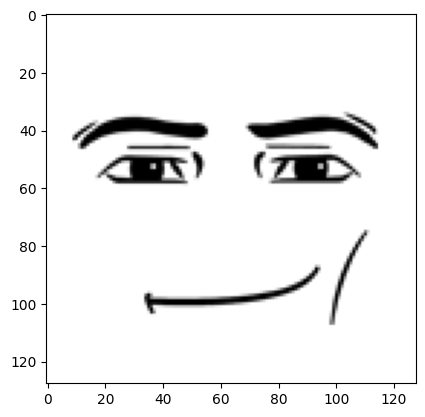

In [249]:
# image from link
url = "https://www.textures-resource.com/resources/sheets/10/9730.png?updated=1534785222"
# load image from this link
import urllib.request
from PIL import Image

image = Image.open(urllib.request.urlopen(url))

# tensor


# convert image to numpy array
image = np.array(image)
# crop and resize to 128x128
image = np.array(Image.fromarray(image).resize((128, 128)))

dummy_image = torch.from_numpy(np.array(image)).permute(2, 0, 1).unsqueeze(0).float()/255

plt.imshow(image)

In [253]:
importlib.reload(model)

bio_encoder = model.Bio_Encoder(in_channels=3,
                    n_electrodes=1000,
                    out_scaling=1,
                    out_activation='sigmoid')
bio_encoder

Bio_Encoder(
  (out_activation): Sigmoid()
  (model): Sequential(
    (0): PolarTransform(
      (output_transform): Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
    )
  )
)

In [254]:
out = bio_encoder(dummy_image)
out.shape

torch.Size([1, 4, 128, 128])

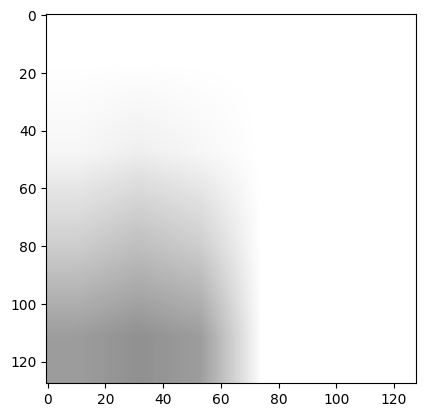

In [255]:
# show
plt.imshow(out[0].permute(1, 2, 0).detach().numpy())

In [200]:
n_bio_params = sum(p.numel() for p in bio_encoder.parameters())
print(n_bio_params)

n_normal_params = sum(p.numel() for p in normal_encoder.parameters())
print(n_normal_params)

print(n_bio_params/n_normal_params)

29676
1110369
0.026726250462684027
